## Introduction

This project involves using simple machine learning models to identify frauduent credit card transations. 

In [1]:
import pandas as pd
import numpy as np


#### Import Data

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

Columns are the result of principal component analysis so column headers do not correspond with original features in the dataset but are rather combinations of features. Each row in this dataset corresponds with a transaction. 

In [2]:
credit_df = pd.read_csv('Data/creditcard.csv')

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = credit_df.drop(['Class'], axis=1)
y = credit_df['Class']

In [5]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [7]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
218556,141361.0,1.820387,0.406277,-0.422172,3.848608,0.192404,-0.115696,0.149229,-0.114804,-0.855877,...,-0.185160,0.063101,0.168957,0.161053,-0.037314,-0.117779,-0.063324,-0.026241,-0.035104,49.26
205256,135657.0,-0.339483,0.708906,-1.036587,0.898636,0.306698,0.153776,1.383622,0.266602,-0.943725,...,0.190770,0.257643,0.424760,0.469497,-0.849882,-0.947238,-0.715008,0.116941,0.217047,200.45
137749,82305.0,0.038296,-2.936676,-1.108168,-0.423923,-0.944666,0.402940,0.374271,-0.172798,-0.718552,...,1.547172,0.525757,-0.246498,-0.840384,-1.278373,0.333752,-0.162512,-0.130106,0.124690,753.50
244210,152252.0,-2.129690,1.326521,0.620255,-0.826510,-0.524953,0.358104,0.292985,0.695087,0.466614,...,0.362525,-0.281611,-0.418699,0.029659,0.690819,-0.131822,-0.009821,0.681434,0.451243,99.99
268502,163243.0,0.090351,0.787187,-0.296789,-1.068828,1.260345,0.236703,0.828873,0.101666,-0.251891,...,0.038822,-0.285680,-0.709115,-0.044286,-0.356659,-0.355143,0.153298,0.237878,0.083374,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239756,150252.0,-2.064658,-2.149601,2.537420,-0.920428,0.632176,-0.000359,-0.151459,-0.659979,0.403878,...,-0.123072,-0.499293,0.262374,0.534826,-0.326070,0.474822,-0.127034,-0.489612,-0.651590,21.31
81950,59174.0,1.107064,-1.338136,1.907193,-0.243249,-2.020151,0.966037,-1.857704,0.520906,0.531552,...,0.131738,0.412694,1.493226,-0.155258,0.328457,0.371770,0.070568,0.106866,0.027490,50.37
5225,5025.0,1.132376,0.122317,0.179001,0.413278,0.806393,1.569714,-0.386295,0.369732,1.377915,...,-0.246150,-0.343052,-0.594625,0.171249,-1.871096,-0.010958,0.236597,0.013853,-0.010476,3.49
78299,57465.0,-2.919364,0.478079,0.679789,-1.316987,-0.058643,-0.240860,0.196095,-0.325773,-0.259423,...,-1.367562,-0.282020,-0.047457,-0.324828,-0.622897,-0.120365,-0.802682,-1.973795,-0.471822,40.00


### Apply Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

#instantiate
Tree = DecisionTreeClassifier(max_depth=2)

#fit
Tree.fit(X_train,y_train)

#predict
y_pred = Tree.predict(X_test)


#### Evaluate Accuracy

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9994382219725431

We can see that this method achieves a high accuracy rating but we know that the dataset has a high class imbalance with almost entirely negative values so this accuracy score does not mean much. I will review the confusion matrix to illustrustrate this point. 

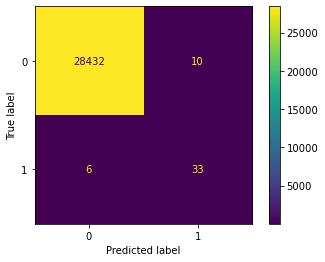

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_pred, y_test)

ConfusionMatrixDisplay(cf_matrix).plot()

We can see that of the 53 fraudulent transations 47 of them were identified as non-fraudulent. This is not a good ratio. I will calculate the precision and recall metrics to show this. 

In [11]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.8461538461538461

In [12]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.7674418604651163

We can see that this model has extemely high precision of 1.0, meaning that it almost never (or never in the case of this dataset) produces false positives. However it has very low recall, meaning that the model only actually catches 11.3 percent of fraudulent transations. I would not recommend the use of this model for that reason. It is possible that some degree of hyperparameter tuning could improve the model however. 

#### Hyperparamer Tuning

I given how small the number of negative values is for this dataset I expect that I will need to increase the max_depth hyperparameter. I will do this below. Specifically I will run a loop which will refit the model at various different max depths and record the metrics scores for each. I will then plot the results to see if there is an optimal setting for max_depth.

In [13]:
from sklearn.metrics import f1_score

recall_scores = []
precision_scores = []
f1_scores = []
accuracy_scores = []
max_depths = range(5,20)

for max_depth in max_depths:
    #instantiate
    Tree = DecisionTreeClassifier(max_depth=max_depth)

    #fit
    Tree.fit(X_train,y_train)

    #predict
    y_pred = Tree.predict(X_test)
    
    #calcuate metrics
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #append scores to list
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    
    
    
#     print(f"Max depth {max_depth} has an accuracy of {accuracy}")
#     print(f"Max depth {max_depth} has an recall of {recall}")
#     print(f"Max depth {max_depth} has an precision of {precision}")

#### Plot results

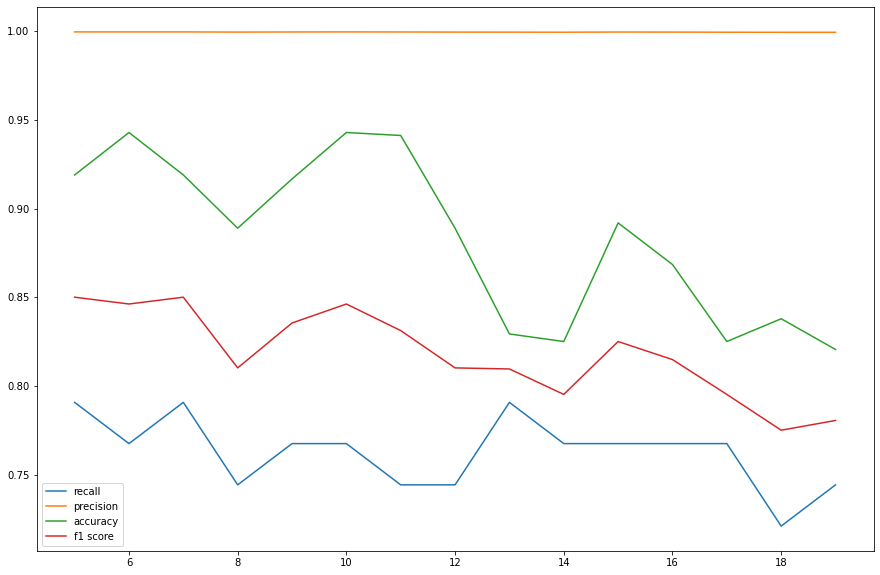

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(max_depths, recall_scores, label='recall')
plt.plot(max_depths, accuracy_scores, label= 'precision')
plt.plot(max_depths, precision_scores, label = 'accuracy')
plt.plot(max_depths, f1_scores, label = 'f1 score')
plt.legend()
plt.show()

It appears that tuning the max depth parameters had a moderate effect on the various relevant metrics. The best setting appears to be at the initial point of max_depth = 5. This is where all of the relevant metric are maximized. After that point the model begins to overfit on the training data. 

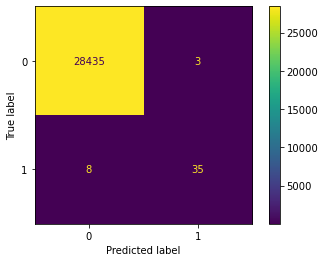

In [15]:
    #instantiate
    Tree = DecisionTreeClassifier(max_depth=5)

    #fit
    Tree.fit(X_train,y_train)

    #predict
    y_pred = Tree.predict(X_test)
    
    
    #Plot Confusion Matrix
    cf_matrix = confusion_matrix(y_test,y_pred)

    ConfusionMatrixDisplay(cf_matrix).plot()

#### Examine Confusion Matrix

We can see from the confusion matrix that there was only 1 false positive in the data and an acceptable 11 false negatives with the majority of fraud cases (42) being detected. I believe that this is an acceptable result. In this case there would be few credit card customers who would be bothered by inappropriate fraud charges however the downside of this approach is that 11 out of the 53 fraudulent transations were not identified meaning that the model is only 79% accurate at identifying these charges. Accross a larger dataset with millions of transations this 20% could add up to significant. Thus I believe the model can still be improved with a different approach.

### Apply Logistic Regression
I will also apply a logistic regresssion to the data to see if I can improve the results using a different model technique. In this example I will apply a gridsearch to optimize the C hyperparameter.

In [18]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

clf = LogisticRegression(max_iter = 500)
grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)




Accuracy Score : 0.9992626663389628
Precision Score : 0.84375
Recall Score : 0.627906976744186
F1 Score : 0.72


array([[28433,     5],
       [   16,    27]])

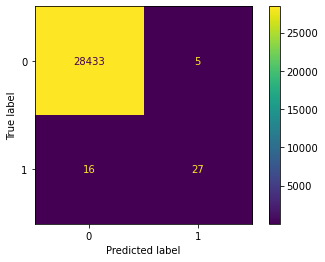

In [19]:
#Logistic Regression (Grid Search) Confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred_acc)

ConfusionMatrixDisplay(cf_matrix).plot()

We can see that the logistic regression performed similarly to the decision tree classifier in terms of the selected metrics. 

### Apply K - nearest neighbor 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Kneighbors = KNeighborsClassifier()
Kneighbors.fit(X_train, y_train)
y_pred = Kneighbors.predict(X_test)

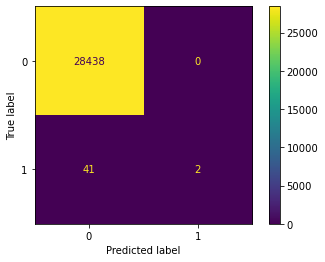

In [21]:
cf_matrix = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(cf_matrix).plot()

Without hyperparameter optimization the K nearest neighbor function produces an output that is produces almost no false positives but a high percentage of false negatives indicating that it is not very accurate at identifying these cases. I will test hyperparameters to see if there is a simple way to improve these. 

In [22]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

GridSearch = GridSearchCV(Kneighbors , param_grid = params, scoring = 'f1' )
GridSearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1')

In [23]:
y_pred_acc = GridSearch.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.9985604438046417
Precision Score : 0.75
Recall Score : 0.06976744186046512
F1 Score : 0.1276595744680851


array([[28437,     1],
       [   40,     3]])

It does not appear that the K neighbors classifier is effective for this use case. 

# Conclusion

I have developed a number of models which could potentially be used in a production setting to assist existing processes with fraud identification. These models can likely be improved with additional tuning. 